In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import seaborn.objects as so
import ipywidgets as widgets

df = pd.read_csv('movie_statistic_dataset.csv')

# __Box Office Analysis Dashboard__

In [115]:
cleanData = df[df["director_name"] != "-"]

## __Average Box Office Gross vs Production Budget:__

Button Pressed


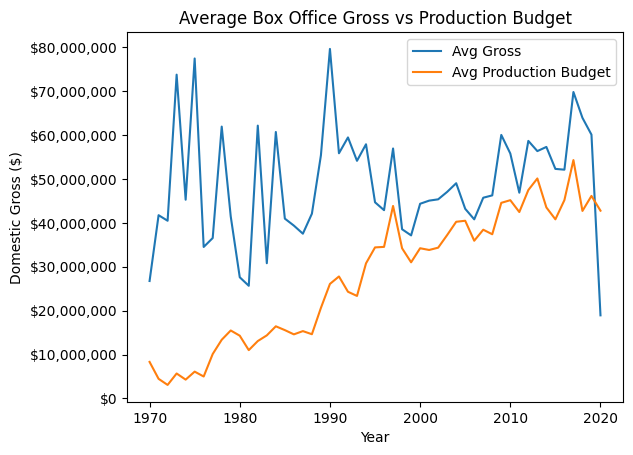

In [117]:
# avg gross box office per year vs production cost, yearly

cleanData["production_date"] = pd.to_datetime(cleanData.loc[:,"production_date"])
decadeDf = pd.DataFrame(columns=["Year", "Avg Gross", "Avg Production Budget"])
pd.set_option("mode.chained_assignment", None)

startYear = 1970
endYear = 2021

for x in range(startYear, endYear, 1):
    
    decadeData = cleanData[cleanData["production_date"].dt.year == x]
    numMovies =  len(decadeData)
    sumGross = sum(decadeData["Domestic gross $"])
    avgGross = sumGross / numMovies
    sumBudget = sum(decadeData["Production budget $"])
    avgBudget = sumBudget / numMovies
    decadeDf.loc[len(decadeDf)] = [x, avgGross, avgBudget]
    
ax = decadeDf.plot( x="Year", xlabel="Year", ylabel="Domestic Gross ($)", title="Average Box Office Gross vs Production Budget");
plt.gca().ticklabel_format(axis='y', style='plain')
ax.yaxis.set_major_formatter('${x:1,.0f}')
print("Button Pressed")

## __All Time Gross by Genre:__

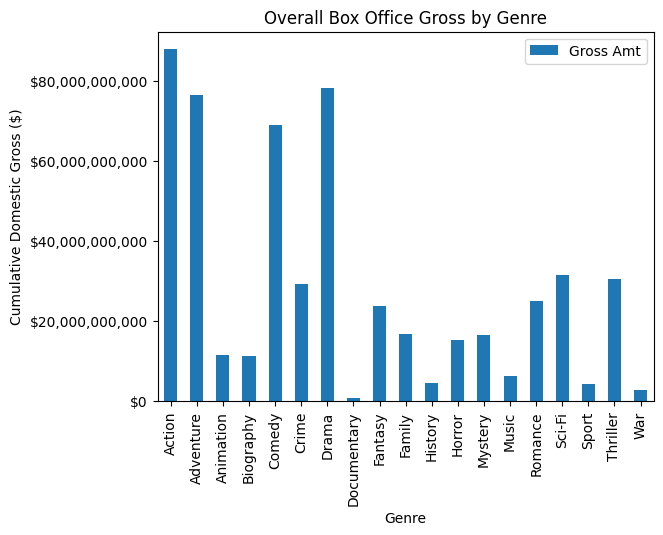

In [102]:


rowsAction = cleanData[cleanData["genres"].str.contains("Action")]
sumAction = sum(rowsAction["Domestic gross $"])

rowsAdventure = cleanData[cleanData["genres"].str.contains("Adventure")]
sumAdventure = sum(rowsAdventure["Domestic gross $"])

rowsAnimation = cleanData[cleanData["genres"].str.contains("Animation")]
sumAnimation = sum(rowsAnimation["Domestic gross $"])

rowsBiography = cleanData[cleanData["genres"].str.contains("Biography")]
sumBiography = sum(rowsBiography["Domestic gross $"])

rowsComedy = cleanData[cleanData["genres"].str.contains("Comedy")]
sumComedy = sum(rowsComedy["Domestic gross $"])

rowsCrime = cleanData[cleanData["genres"].str.contains("Crime")]
sumCrime = sum(rowsCrime["Domestic gross $"])

rowsDrama = cleanData[cleanData["genres"].str.contains("Drama")]
sumDrama = sum(rowsDrama["Domestic gross $"])

rowsDocumentary = cleanData[cleanData["genres"].str.contains("Documentary")]
sumDocumentary = sum(rowsDocumentary["Domestic gross $"])

rowsFantasy = cleanData[cleanData["genres"].str.contains("Fantasy")]
sumFantasy = sum(rowsFantasy["Domestic gross $"])

rowsFamily = cleanData[cleanData["genres"].str.contains("Family")]
sumFamily = sum(rowsFamily["Domestic gross $"])

rowsHistory = cleanData[cleanData["genres"].str.contains("History")]
sumHistory = sum(rowsHistory["Domestic gross $"])

rowsHorror = cleanData[cleanData["genres"].str.contains("Horror")]
sumHorror = sum(rowsHorror["Domestic gross $"])

rowsMystery = cleanData[cleanData["genres"].str.contains("Mystery")]
sumMystery = sum(rowsMystery["Domestic gross $"])

rowsMusic = cleanData[cleanData["genres"].str.contains("Music")]
sumMusic = sum(rowsMusic["Domestic gross $"])

rowsRomance = cleanData[cleanData["genres"].str.contains("Romance")]
sumRomance = sum(rowsRomance["Domestic gross $"])

rowsSciFi = cleanData[cleanData["genres"].str.contains("Sci-Fi")]
sumSciFi = sum(rowsSciFi["Domestic gross $"])

rowsSport = cleanData[cleanData["genres"].str.contains("Sport")]
sumSport = sum(rowsSport["Domestic gross $"])

rowsThriller = cleanData[cleanData["genres"].str.contains("Thriller")]
sumThriller = sum(rowsThriller["Domestic gross $"])

rowsWar = cleanData[cleanData["genres"].str.contains("War")]
sumWar = sum(rowsWar["Domestic gross $"])

genreNames = ["Action","Adventure","Animation","Biography","Comedy","Crime","Drama","Documentary","Fantasy","Family", "History", "Horror", "Mystery", "Music", "Romance", "Sci-Fi", "Sport", "Thriller", "War"]
genreAmts = [sumAction , sumAdventure, sumAnimation,sumBiography, sumComedy, sumCrime, sumDrama, sumDocumentary, sumFantasy, sumFamily, sumHistory, sumHorror, sumMystery, sumMusic, sumRomance, sumSciFi, sumSport, sumThriller, sumWar]
values = list(zip(genreNames,genreAmts))
genreDf = pd.DataFrame(values, columns = ["Genre","Gross Amt"])

ax = genreDf.plot.bar( x = "Genre", ylabel="Cumulative Domestic Gross ($)",  title="Overall Box Office Gross by Genre");
plt.gca().ticklabel_format(axis='y', style='plain')
ax.yaxis.set_major_formatter('${x:1,.0f}')




    


## __Top Five Directors of 2022:__

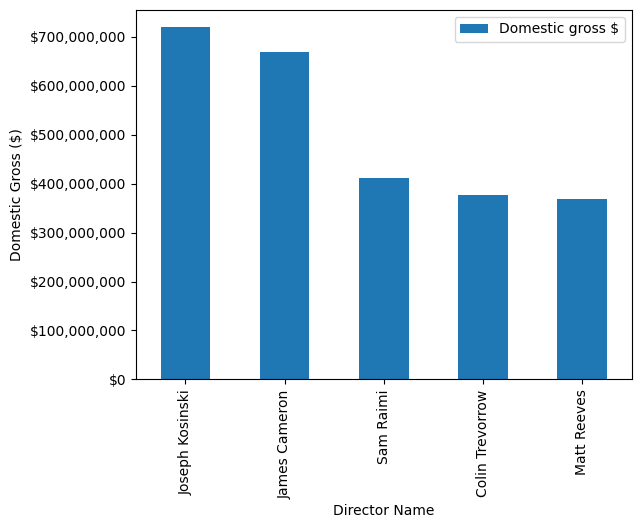

In [103]:

directorData = cleanData.sort_values(by=["Domestic gross $"], ascending=False)
currentYear = directorData[directorData["production_date"] >= "2022-01-01"]
topFive = currentYear.iloc[[0,1,2,3,4,]]
ax = barplot = topFive.plot.bar( y = "Domestic gross $", x = "director_name", ylabel = "Domestic Gross ($)" , xlabel = "Director Name");
plt.gca().ticklabel_format(axis='y', style='plain')
ax.yaxis.set_major_formatter('${x:1,.0f}')


## __Predict New Movie Performance by Genre:__

In [104]:

ddGenre = widgets.Dropdown(
    options= genreNames,
    value="Action",
    description='Genre:',
    disabled=False,
)
ddGenre

Dropdown(description='Genre:', options=('Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'D…

In [105]:
out = widgets.Output()
def predictByGenre(b):
    with out:
        out.clear_output()
        genreChoice = ddGenre.value
        Raw = cleanData[cleanData["genres"].str.contains(genreChoice)]
        YearGross = Raw[["production_date", "Domestic gross $"]]
        YearGross["Year"] = YearGross.loc[:,"production_date"].dt.year
        y = YearGross["Domestic gross $"].values.reshape(-1, 1)
        x = YearGross["Year"].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,)
        LinReg = LinearRegression()
        LinReg.fit(x_train, y_train)
        predValue = LinReg.predict([[2023]])
        grossValue = "{:0,.2f}".format(float(predValue[0][0]))
        score = LinReg.score(x_test,y_test)
        print("Predicted Gross: $"+ grossValue)
        print("R^2 score: "+ str(score))
        sns.regplot( x="Year", y="Domestic gross $", data=YearGross).set(ylabel = "Domestic Gross ($)", title = "Domestic Gross of " + ddGenre.value + " Movies over Time");
        plt.annotate("Predicted Value", xytext=(2023,0), xy=(2023, predValue), arrowprops={"facecolor":"red"})
        plt.gca().ticklabel_format(axis='y', style='plain')
        ax = plt.subplot()
        ax.yaxis.set_major_formatter('${x:1,.0f}')
        plt.show()
Pbutton = widgets.Button(
    description='Predict',
)



In [106]:
Pbutton.on_click(predictByGenre)
Pbutton

Button(description='Predict', style=ButtonStyle())

In [107]:
out

Output()

In [108]:
directorNames = cleanData.loc[:,"director_name"]
directorNames = directorNames.astype('str')
directorNames.drop_duplicates(inplace=True)
directorNames.sort_values(inplace=True)

## __Predict New Movie Performance By Director:__

In [109]:
ddDirectors = widgets.Dropdown(
    options= directorNames,
    value="John Carpenter",
    description='Directors:',
    disabled=False,
)
ddDirectors

Dropdown(description='Directors:', index=794, options=('Aaron Woodley', 'Abderrahmane Sissako', 'Abel Ferrara'…

In [110]:
outTwo = widgets.Output()
def predictByDirector(b):
    with outTwo:
        outTwo.clear_output()
        directorChoice = ddDirectors.value
        Raw = cleanData[cleanData["director_name"].str.contains(directorChoice)]
        YearGross = Raw[["production_date", "Domestic gross $"]]
        YearGross["Year"] = YearGross["production_date"].dt.year
        y = YearGross["Domestic gross $"].values.reshape(-1, 1)
        x = YearGross["Year"].values.reshape(-1, 1)
        if (len(YearGross) > 3) :
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,)
            LinReg = LinearRegression()
            LinReg.fit(x_train, y_train)
            predValue = LinReg.predict([[2023]])
            grossValue = "{:0,.2f}".format(float(predValue[0][0]))
            print("Predicted Gross: $"+ grossValue)
            score = LinReg.score(x_test,y_test)
            print("R^2 score: "+ str(score))
            sns.regplot(x="Year", y="Domestic gross $", data=YearGross).set(ylabel = "Domestic Gross ($)", title = "Domestic Gross of " + ddDirectors.value + " Movies over Time");
            plt.annotate("Predicted Value", xytext=(2023,0), xy=(2023, predValue), arrowprops={"facecolor":"red"})
            plt.gca().ticklabel_format(axis='y', style='plain')
            plt.xlim(None, 2023)
            ax = plt.subplot()
            ax.yaxis.set_major_formatter('${x:1,.0f}')
            plt.show()
        else:
            print("Error: Too few data points to accurately predict")
            print("Director must be credited for more than three films")
dbutton = widgets.Button(
    description='Predict',
)


In [111]:
dbutton.on_click(predictByDirector)
dbutton

Button(description='Predict', style=ButtonStyle())

In [112]:
outTwo

Output()